In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from google.colab  import files
from zipfile import ZipFile
import pandas as pd
import glob
import random
import os
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense , BatchNormalization, Dropout
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.layers import LSTM 
from keras.layers import Bidirectional, GlobalMaxPool1D
from sklearn.model_selection import KFold,cross_val_score
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [0]:
!pip install -q kaggle

In [3]:
# uploaded = files.upload()

TypeError: ignored

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d shawon10/ckplus

ckplus.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
file_name = "ckplus.zip"

In [7]:
with ZipFile(file_name, 'r') as zip: 
    zip.printdir() 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
CK+48/anger/S010_004_00000017.png              2019-10-09 04:50:18         1767
CK+48/anger/S010_004_00000018.png              2019-10-09 04:50:18         1765
CK+48/anger/S010_004_00000019.png              2019-10-09 04:50:18         1765
CK+48/anger/S011_004_00000019.png              2019-10-09 04:50:18         1713
CK+48/anger/S011_004_00000020.png              2019-10-09 04:50:18         1729
CK+48/anger/S011_004_00000021.png              2019-10-09 04:50:18         1726
CK+48/anger/S014_003_00000028.png              2019-10-09 04:50:18         1743
CK+48/anger/S014_003_00000029.png              2019-10-09 04:50:26         1736
CK+48/anger/S014_003_00000030.png              2019-10-09 04:50:26         1751
CK+48/anger/S022_005_00000030.png              2019-10-09 04:50:26         1716
CK+48/anger/S022_005_00000031.png              2019-10-09 04:50:26         1707
CK+48/anger/S022_005_00000032.png       

In [0]:
data = []
labels = []

classes = 7
data_path = "/content/CK+48"

In [9]:
os.mkdir('/content/Dataset')
classname = ['anger','contempt','disgust','fear','happy','sadness','surprise']
for i in range(classes):
  Source_Path = data_path + '/' + classname[i]+'/'
  Destination = '/content/Dataset' + '/' + classname[i]+'/'
  os.mkdir('/content/Dataset/'+ classname[i])
  for count, filename in enumerate(os.listdir(Source_Path)):
          dst =  classname[i] + str(count) + ".jpg"

          # rename all the files
          os.rename(os.path.join(Source_Path, filename),  os.path.join(Destination, dst))


FileExistsError: ignored

In [0]:
data_path = "/content/Dataset"
classname = ['anger','contempt','disgust','fear','happy','sadness','surprise']
for i in range(classes):
    path = os.path.join(data_path,classname[i])
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((48,48))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [11]:


print(labels)
len(labels)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

981

In [16]:
#Converting lists into numpy arrays
data = np.array(data)
data = data.reshape(981,48,48,1) 
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


(981, 48, 48, 1) (981,)


In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(784, 48, 48, 1) (197, 48, 48, 1) (784,) (197,)


In [0]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)


In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(7, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 44, 44, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 40, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Input, Flatten, Embedding, Conv1D, MaxPooling1D, Concatenate, LSTM, Dropout, Reshape
from keras.models import Model, load_model
import numpy as np
import keras.models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Bidirectional
from keras.layers.normalization import BatchNormalization
import glob

In [0]:

from keras.callbacks import ModelCheckpoint
filepath="traffic.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss' , factor=0.01 , patience=15 , verbose=1 , min_delta=0.00001 , min_lr=0.0001 )
callbacks_list = [checkpoint,reduce_lr]

In [29]:
epochs = 15

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test),verbose = 2,callbacks=callbacks_list)

Train on 784 samples, validate on 197 samples
Epoch 1/15
 - 10s - loss: 0.9489 - acc: 0.6467 - val_loss: 0.7834 - val_acc: 0.7259

Epoch 00001: val_acc improved from 0.63959 to 0.72589, saving model to traffic.best.hdf5
Epoch 2/15
 - 10s - loss: 0.7873 - acc: 0.7066 - val_loss: 0.5200 - val_acc: 0.8020

Epoch 00002: val_acc improved from 0.72589 to 0.80203, saving model to traffic.best.hdf5
Epoch 3/15
 - 10s - loss: 0.6639 - acc: 0.7526 - val_loss: 0.4802 - val_acc: 0.8629

Epoch 00003: val_acc improved from 0.80203 to 0.86294, saving model to traffic.best.hdf5
Epoch 4/15
 - 10s - loss: 0.5351 - acc: 0.8036 - val_loss: 0.4465 - val_acc: 0.8934

Epoch 00004: val_acc improved from 0.86294 to 0.89340, saving model to traffic.best.hdf5
Epoch 5/15
 - 10s - loss: 0.4694 - acc: 0.8367 - val_loss: 0.2700 - val_acc: 0.9391

Epoch 00005: val_acc improved from 0.89340 to 0.93909, saving model to traffic.best.hdf5
Epoch 6/15
 - 10s - loss: 0.3992 - acc: 0.8571 - val_loss: 0.2462 - val_acc: 0.9289


In [0]:
model.load_weights("traffic.best.hdf5")

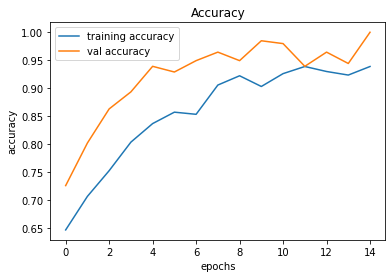

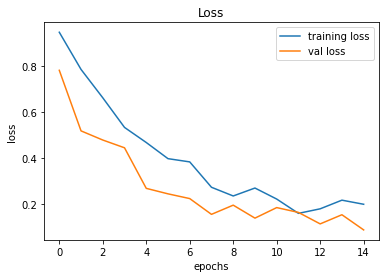

In [31]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:

test_img = Image.open('/content/surprise.png')
test_img = test_img.resize((48,48))
test_img=np.array(test_img)
# test_img=np.dot(test_img[...,:3], [0.2989, 0.5870, 0.1140])
test_img = test_img.reshape(-1,48,48,1)

In [56]:
pred = model.predict_classes(test_img)
#predictong accuracy with the test data

print(pred)
#model.save('traffic_classifier.h5')

[6]
